In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
data_dirname = '../data/'
label_plant_filename = 'species.csv'
label_plant_dict = pd.read_csv(data_dirname+label_plant_filename, index_col=0, header=None)
label_plant_dict = label_plant_dict.to_dict()[1]

model_dirname_snmf = '../models/matrix_decomposition/'
snmf_comp_filename = 'snmf_components.npz'
df = np.load(model_dirname_snmf+snmf_comp_filename)
classes = df['classes']
snmf_components = df['components'].item()
snmf_Omegas = df['Omegas'].item()


model_dirname_sntd = '../models/tucker_decomposition/'
sntd_comp_filename = 'sntd_components.npz'
df = np.load(model_dirname_sntd+sntd_comp_filename)
sntd_components = df['components'].item()
sntd_Omegas = df['Omegas'].item()

print label_plant_dict

{1: 'Althaea officinalis', 2: 'Aronia melanocarpa', 3: 'Bergenia crassifolia', 4: 'Betula pendula (leaves)', 5: 'Betula pendula (buds)', 6: 'Helichrysum arenarium', 7: 'Sambucus nigra (flowers)', 8: 'Valeriana officinalis', 9: 'Ginkgo biloba', 10: 'Melilotus officinalis', 11: 'Origanum vulgare', 12: 'Panax ginseng', 13: 'Rhamnus cathartica', 14: 'Fragaria vesca', 15: 'Hypericum perforatum', 16: 'Viburnum opulus', 17: 'Coriandrum sativum', 18: 'Urtica dioica', 20: 'Frangula alnus', 23: 'Convallaria transcaucasica', 24: 'Potentilla erecta', 25: 'Tilia cordata', 26: 'Linum usitatissimum', 27: 'Arctium lappa', 28: 'Tussilago farfara', 29: 'Juniperus communis', 30: 'Mentha x piperita', 31: 'Calendula officinalis', 32: 'Tanacetum vulgare', 33: 'Plantago major', 34: 'Artemisia absinthium', 35: 'Leonurus quinquelobatus', 36: 'Silybum marianum', 37: 'Rhodiola rosea', 38: 'Matricaria chamomilla', 39: 'Senna alexandrina', 40: 'Polemonium caeruleum', 41: 'Glycyrrhiza glabra', 42: 'Pinus sylvestris

Bergenia crassifolia 3


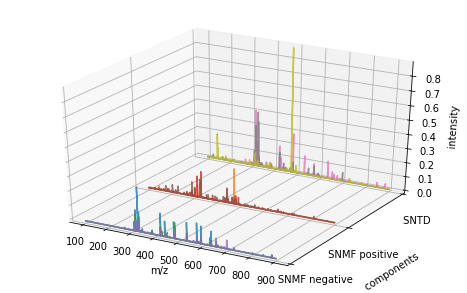

Betula pendula (leaves) 4


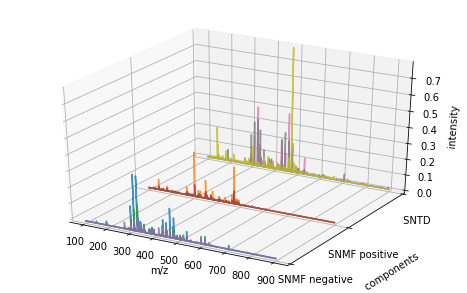

Helichrysum arenarium 6


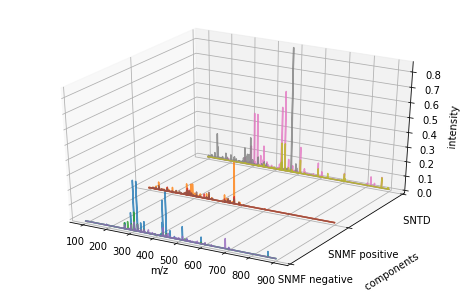

Valeriana officinalis 8


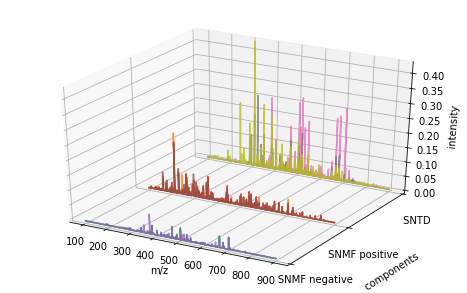

Melilotus officinalis 10


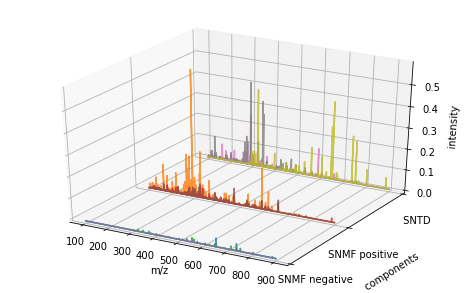

Origanum vulgare 11


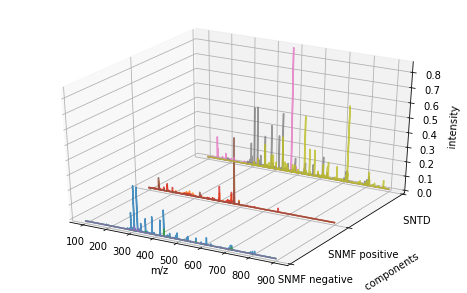

Panax ginseng 12


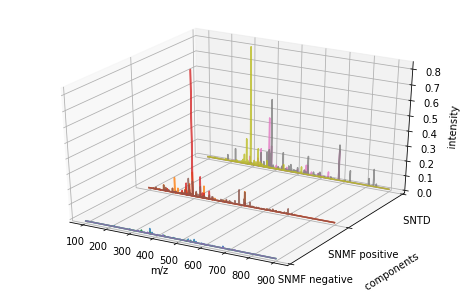

Hypericum perforatum 15


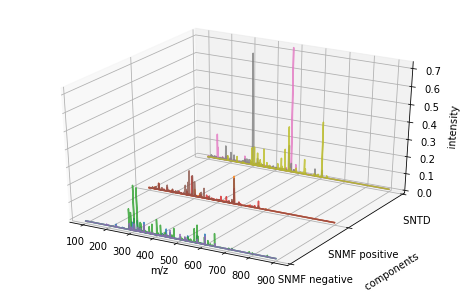

Coriandrum sativum 17


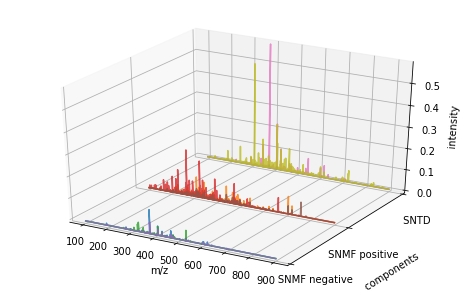

Urtica dioica 18


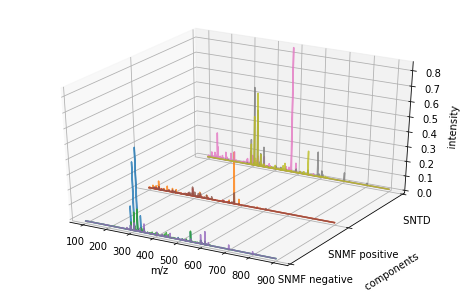

Potentilla erecta 24


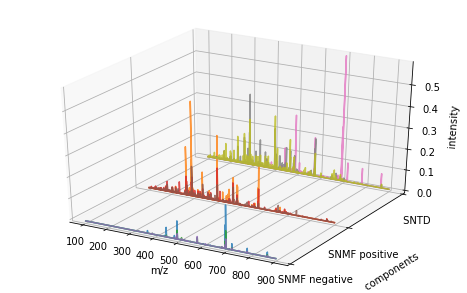

Linum usitatissimum 26


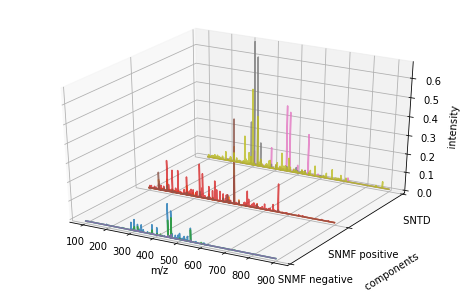

Arctium lappa 27


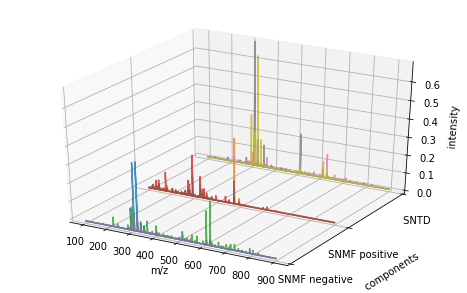

Tussilago farfara 28


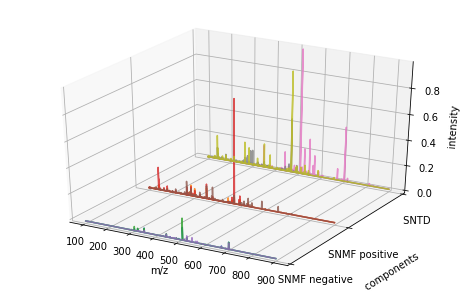

Mentha x piperita 30


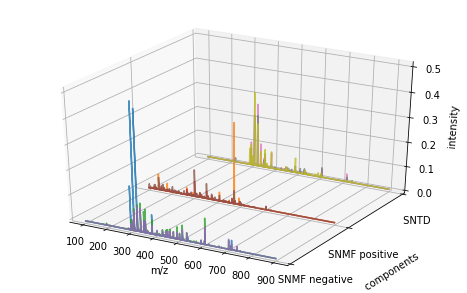

Calendula officinalis 31


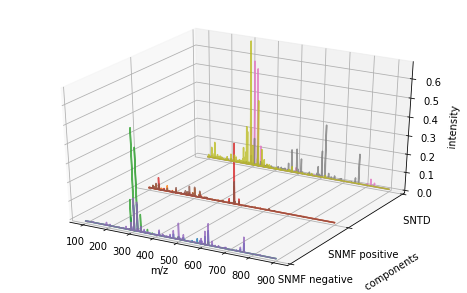

Tanacetum vulgare 32


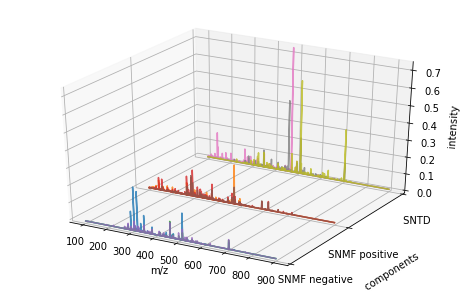

Plantago major 33


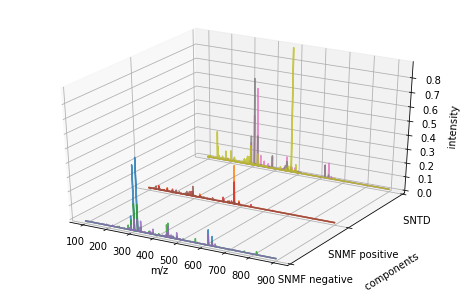

Artemisia absinthium 34


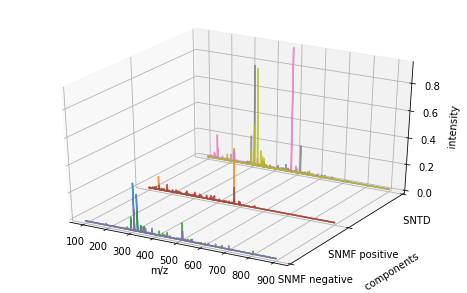

Leonurus quinquelobatus 35


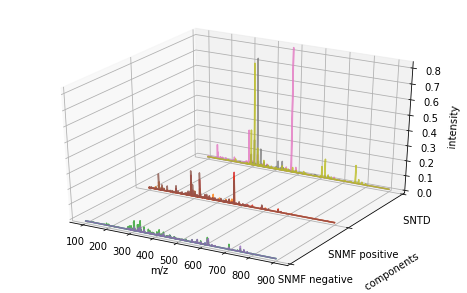

Silybum marianum 36


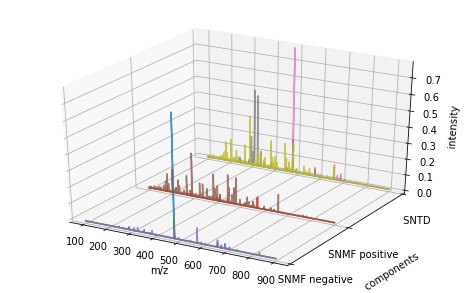

Rhodiola rosea 37


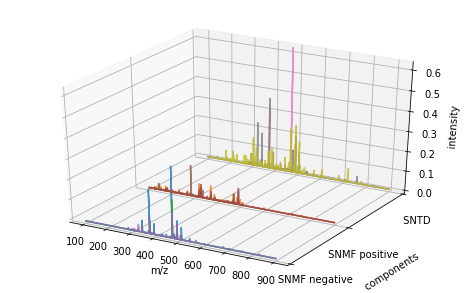

Matricaria chamomilla 38


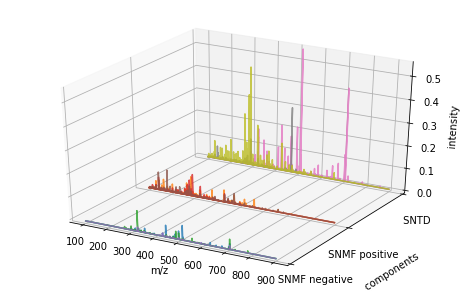

Polemonium caeruleum 40


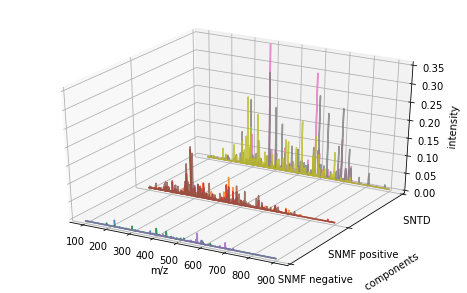

Glycyrrhiza glabra 41


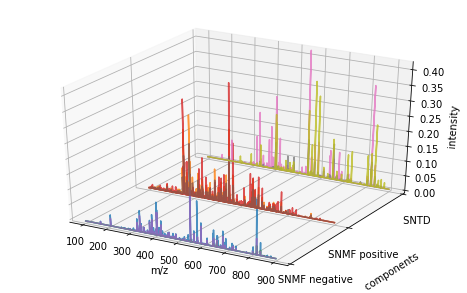

Pinus sylvestris 42


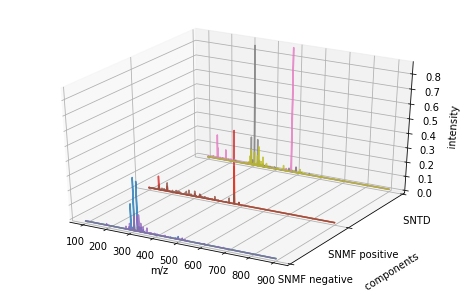

Anethum graveolens 44


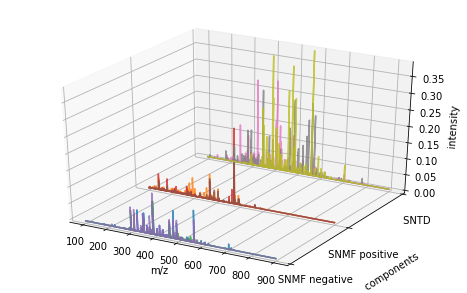

Equisetum arvense 46


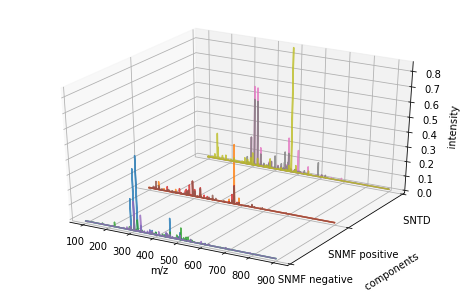

Humulus lupulus 47


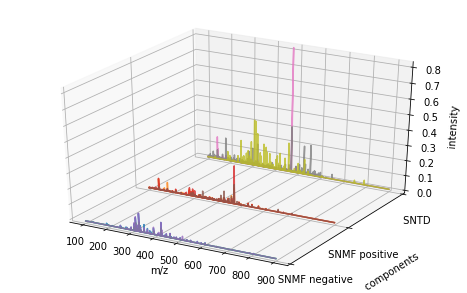

Thymus serpyllum 48


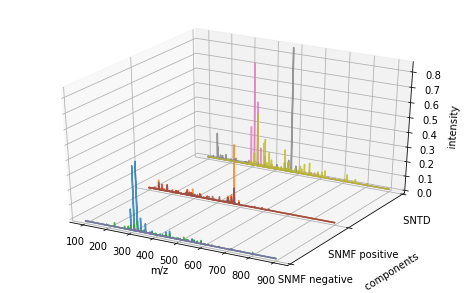

Bidens tripartita 49


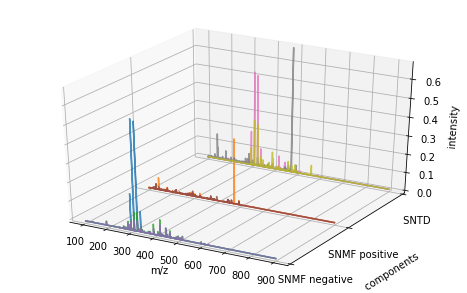

Salvia officinalis 52


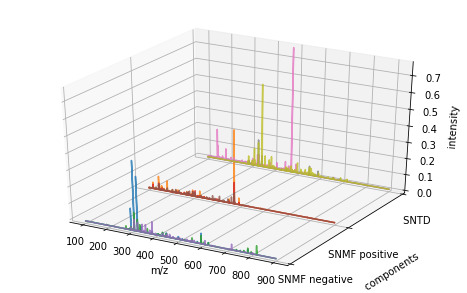

Eleutherococcus senticosus 53


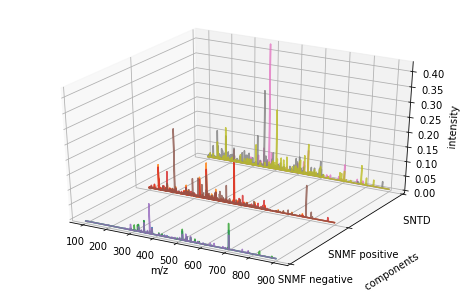

Aerva lanata 54


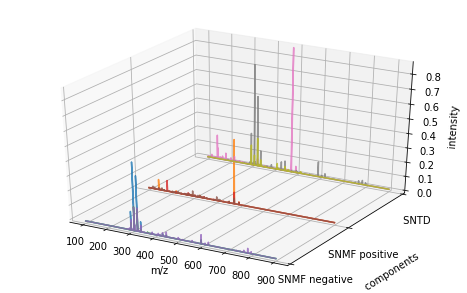

Eleutherococcus sessiliflorus 56


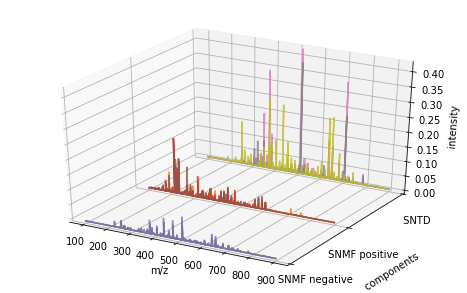

Aralia elata 57


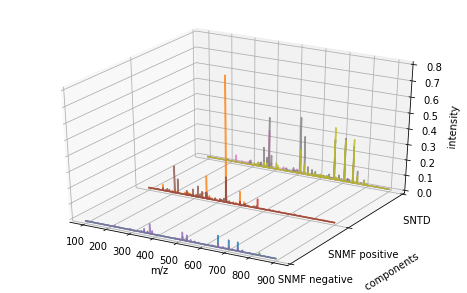

Oplopanax elatus 58


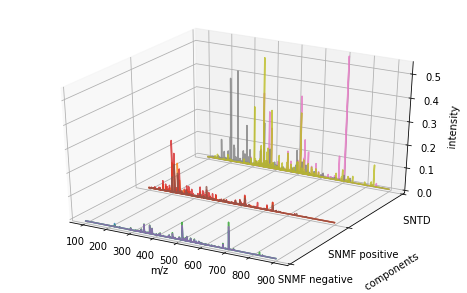

Inula helenium 59


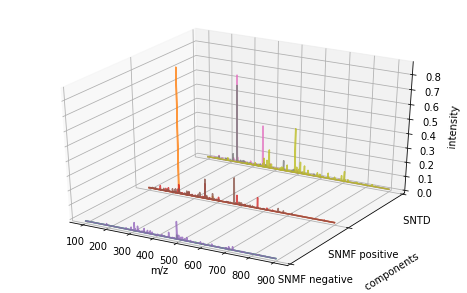

Helianthus tuberosus 60


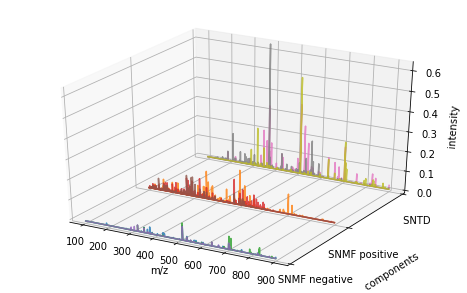

Angelica archangelica 61


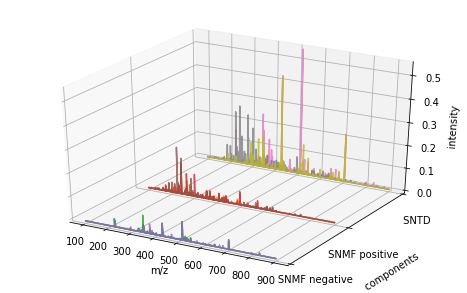

Acorus calamus 62


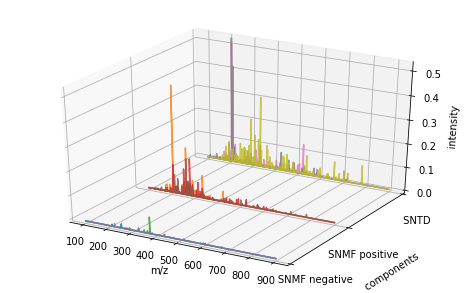

Rosa majalis 63


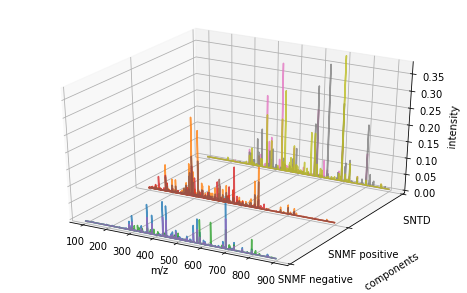

Sambucus nigra (roots) 64


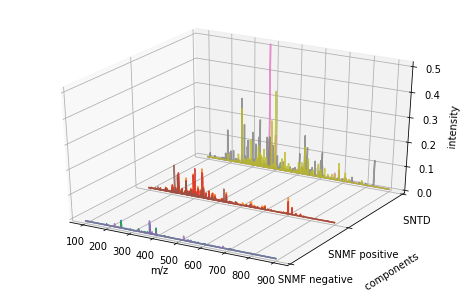

Levisticum officinale 65


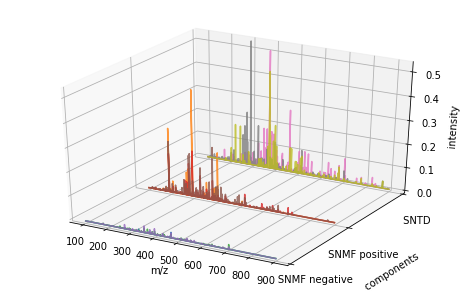

Aegopodium podagraria 66


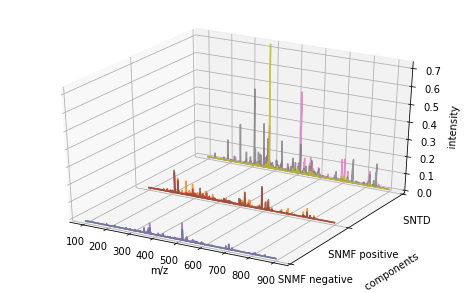

Bupleurum aureum 67


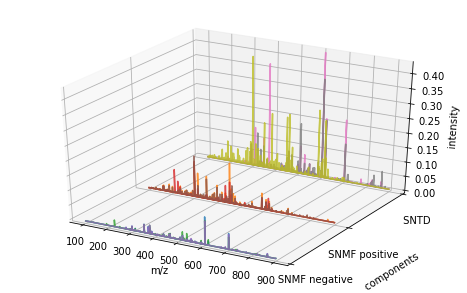

Pimpinella saxifraga 68


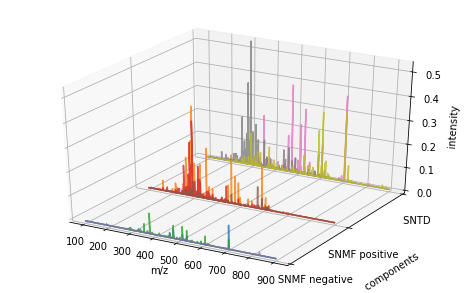

Heracleum sibiricum 69


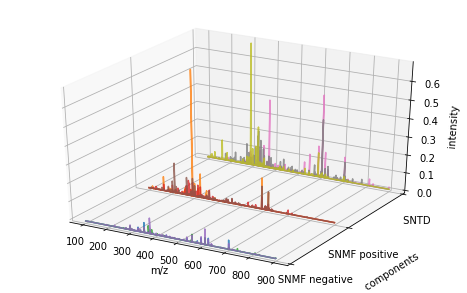

Daucus carota 70


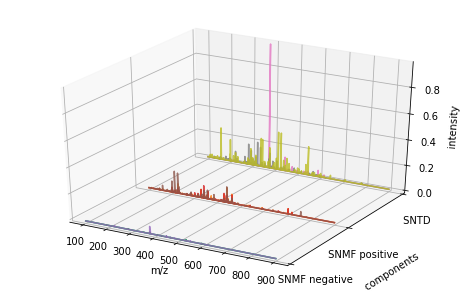

Petroselinum crispum 71


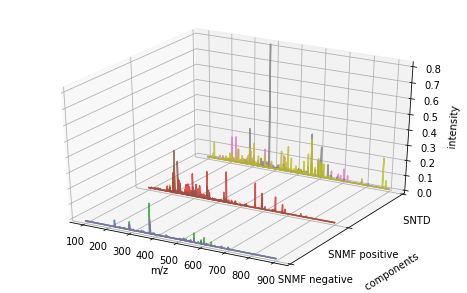

Foeniculum vulgare 72


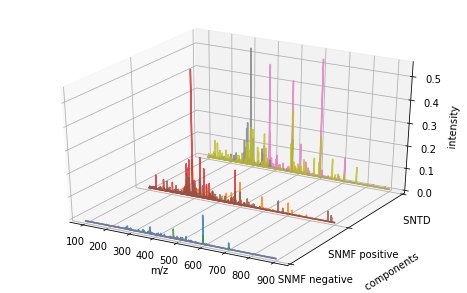

Pimpinella anisum 73


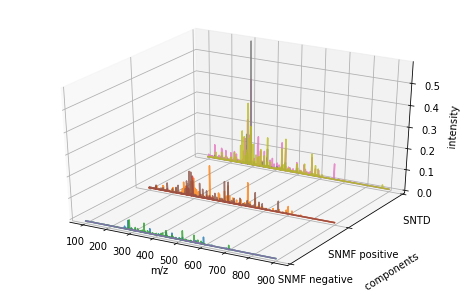

Asarum europaeum 75


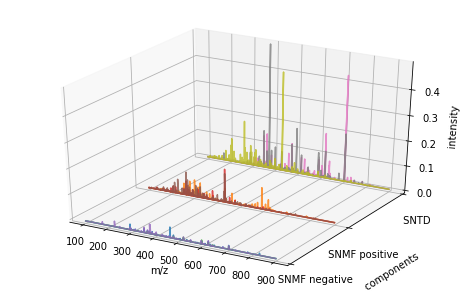

Cichorium intybus 76


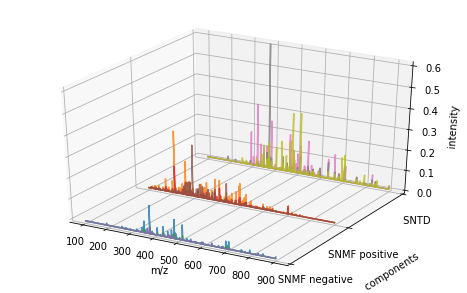

Dioscorea caucasica 77


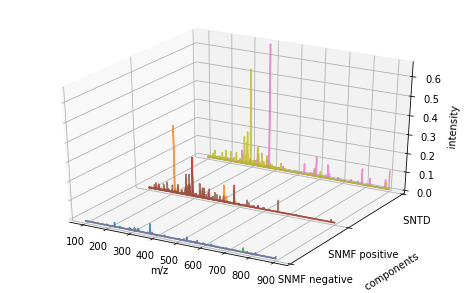

Taraxacum officinale 78


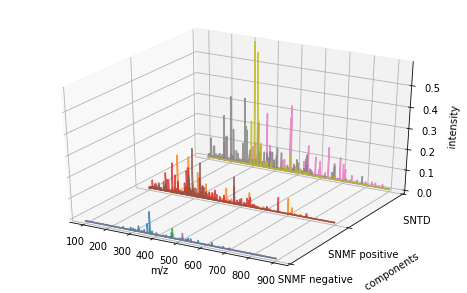

Hedysarum neglectum 79


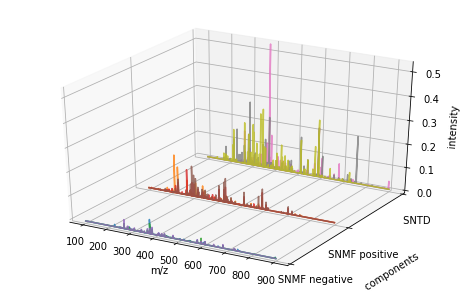

Astragalus membranaceus 80


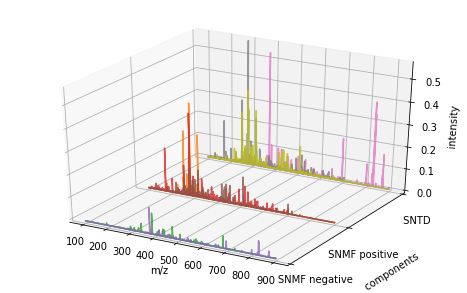

In [3]:
plt.clf();

for i_cl in xrange(1, len(classes)):
    current_component_class = classes[i_cl]
    print label_plant_dict[current_component_class], current_component_class
    fig = plt.figure(figsize=(8,5));
    #fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(111, projection='3d');
    mz_axis = np.arange(100, 900)
    current_snmf_components = snmf_components[current_component_class][:, snmf_Omegas[current_component_class]]
    current_sntd_components = sntd_components[current_component_class][:, sntd_Omegas[current_component_class]]
    zmax = 0.
    for i in xrange(len(snmf_Omegas[current_component_class])):
        ax.plot(mz_axis, current_snmf_components[:len(mz_axis), i],  0, zdir='y', alpha=0.8);
        ax.plot(mz_axis, current_snmf_components[len(mz_axis):, i], 0.1, zdir='y', alpha=0.8);
        zmax = max(zmax, current_snmf_components[:len(mz_axis), i].max())
        zmax = max(zmax, current_snmf_components[len(mz_axis):, i].max())
    for i in xrange(len(sntd_Omegas[current_component_class])):
        ax.plot(mz_axis, current_sntd_components[:, i], 0.2, zdir='y', alpha=0.8);
        zmax = max(zmax, current_sntd_components[:, i].max())
    ax.set_xlabel('m/z')
    ax.set_yticks([0., 0.1, 0.2])
    ax.set_ylim([0., 0.2])
    ax.set_yticklabels(['       SNMF negative', '\n SNMF positive', '\n SNTD'])
    ax.set_ylabel('\n components', linespacing=6.2)
    ax.set_zlabel('intensity')
    ax.set_zlim([0., zmax])
    
    #plt.savefig('./run2/'+str(classes[i_cl])+'.pdf')
    plt.show();